In [126]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 5) # set default size of plots
import networkx as nx
import EoN
%matplotlib inline

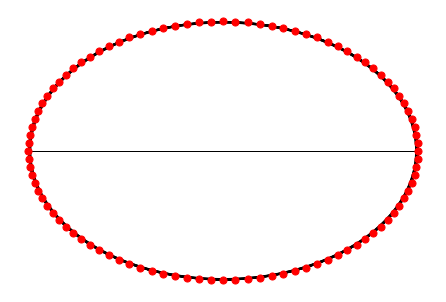

In [74]:
N = 100
l = int(N/20)
G = nx.watts_strogatz_graph(N, 2*l, 0)
G.add_edge(0, int(N/2))
nx.draw_circular(G, node_size = 50, node_color = 'red')

In [249]:
df_final = pd.DataFrame()
N = 1000
L_lst = [2]
for L in L_lst:
    
    # Create the Graph G
    #L = 1
    G = nx.watts_strogatz_graph(N, 2*L, 0)
    G.add_edge(0, int(N/2))

    # Simulate the IS Model
    lst =[]
    for i in range(0, G.number_of_nodes(), 1):
        sum = 0
        iterations = 100
        for j in range(iterations):
            beta = 0.1 # transmission rate 
            gamma = 0 # recovery rate = 1 / D where D is the average duration of infection. Setting this to 0 means SI model.

            df = EoN.fast_SIR(G, beta, gamma, initial_infecteds = i, return_full_data = True)
            sum+= df.t()[-1]

        lst.append(sum/iterations)
    df_final['Time'] = lst
    
    #plt.plot(lst)
#plt.legend(['N: 10', 'N: 50', 'N: 100', 'N: 250'])
#plt.title(label = "L = " + str(l) + ", Beta = " + str(beta) + " in " + str(iterations) + " Iterations")
#plt.show()

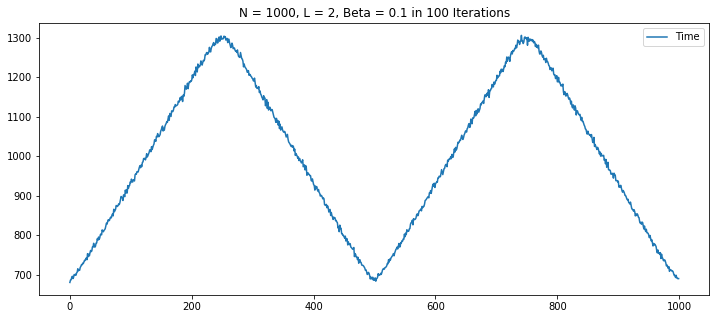

In [250]:
df_final.plot(title = "N = " + str(N) + ", L = " + str(L) +", Beta = " + str(beta) + " in " + str(iterations) + " Iterations",
      figsize = (12, 5))

In [252]:
xdata = df_final.index[0:500]
ydata = df_final['Time'].values.round(2)[0:500]

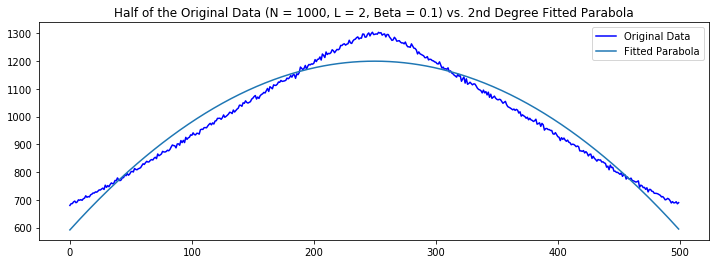

In [254]:
import numpy.polynomial.polynomial as poly

coefs = poly.polyfit(xdata, ydata, 2)
ffit = poly.polyval(xdata, coefs)
fig = plt.figure(figsize = (12, 4))
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, ffit)
plt.title(label = 'Half of the Original Data (N = 1000, L = 2, Beta = 0.1) vs. 2nd Degree Fitted Parabola')
plt.legend(['Original Data', 'Fitted Parabola'])